In [1]:
library(SparkR)
library(ggplot2)


Attaching package: 'SparkR'


The following objects are masked from 'package:stats':

    cov, filter, lag, na.omit, predict, sd, var, window


The following objects are masked from 'package:base':

    as.data.frame, colnames, colnames<-, drop, endsWith, intersect,
    rank, rbind, sample, startsWith, subset, summary, transform, union



Attaching package: 'ggplot2'


The following object is masked from 'package:SparkR':

    expr




In [2]:
import findspark
findspark.init()

ERROR: Error in parse(text = x, srcfile = src): <text>:1:8: unexpected symbol
1: import findspark
           ^


In [2]:
sparkR.session()
crsp <- read.df("C:/Users/jack_/Desktop/Big Data Project/updated datasets/Heart Disease Mortality by State.csv", "csv", inferSchema = "true", header = "true", )

Spark package found in SPARK_HOME: C:\Users\jack_\Desktop\spark-3.0.0-preview2-bin-hadoop2.7



Launching java with spark-submit command C:\Users\jack_\Desktop\spark-3.0.0-preview2-bin-hadoop2.7/bin/spark-submit2.cmd   sparkr-shell C:\Users\jack_\AppData\Local\Temp\RtmpoXlOx1\backend_port66a862fa2cb5 


Warning message in sparkR.session():
"Version mismatch between Spark JVM and SparkR package. JVM version was 3.0.0-preview2 , while R package version was 2.4.5"


Java ref type org.apache.spark.sql.SparkSession id 1 

In [45]:
createOrReplaceTempView(crsp, "crsp")
lcd <- sql("select STATE, RATE from crsp where YEAR = 2018")
createOrReplaceTempView(lcd, 'lcd')
lcdavg <- sql("select STATE as csn, avg(RATE) as avg_HeartDis from lcd 
group by STATE order by STATE")
createOrReplaceTempView(lcdavg, "lcd_avg")
regiondf <- read.df("C:/Users/jack_/Desktop/Big Data Project/Copy of regions.csv", "csv", inferSchema = "true", header = "true")
createOrReplaceTempView(regiondf, "regiondf")
lcdcr = sql("select r.Region, csn, avg_HeartDis from lcd_avg l, regiondf r where l.csn = r.abbr")
createOrReplaceTempView(lcdcr, "lcd_by_reg")
lcd_heartdis_by_region = sql("select Region, avg(avg_HeartDis) as HeartDis_AVG from lcd_by_reg group by Region")
createOrReplaceTempView(lcd_heartdis_by_region, "heartdis_avg_by_reg")
rdf = collect(lcd_heartdis_by_region)
collect(lcd_heartdis_by_region)

,Region,HeartDis_AVG
,<chr>,<dbl>
1,South,186.3938
2,West,144.5077
3,North-East,154.6667
4,Mid-West,163.4917


In [18]:
south <- sql("select HeartDis_AVG, '2018' as Year from heartdis_avg_by_reg where Region = 'South'")
west <- sql("select HeartDis_AVG, '2018' as Year from heartdis_avg_by_reg where Region = 'West'")
northeast <- sql("select HeartDis_AVG, '2018' as Year from heartdis_avg_by_reg where Region = 'North-East'")
midwest <- sql("select HeartDis_AVG, '2018' as Year from heartdis_avg_by_reg where Region = 'Mid-West'")
createOrReplaceTempView(south, "s18")
createOrReplaceTempView(west, "w18")
createOrReplaceTempView(northeast, "ne18")
createOrReplaceTempView(midwest, "mw18")

In [19]:
south <- sql("select * from s14 union select * from s15 union select * from s16 union select * from s17 union select * from s18")
west <- sql("select * from w14 union select * from w15 union select * from w16 union select * from w17 union select * from w18")
north_east <- sql("select * from ne14 union select * from ne15 union select * from ne16 union select * from ne17 union select * from ne18")
mid_west <- sql("select * from mw14 union select * from mw15 union select * from mw16 union select * from mw17 union select * from mw18")
south_rdf <- collect(south)
west_rdf <- collect(west)
north_east_rdf <- collect(north_east)
mid_west_rdf <- collect(mid_west)
collect(south)
collect(west)
collect(north_east)
collect(mid_west)

,HeartDis_AVG,Year
,<dbl>,<chr>
1,191.6500,2015
2,188.3812,2016
3,190.5062,2014
4,186.3938,2018
5,188.5625,2017


,HeartDis_AVG,Year
,<dbl>,<chr>
1,147.1000,2017
2,147.3692,2014
3,144.5077,2018
4,149.5385,2015
5,148.4308,2016


,HeartDis_AVG,Year
,<dbl>,<chr>
1,157.3667,2014
2,156.6222,2016
3,154.1222,2017
4,154.6667,2018
5,159.0667,2015


,HeartDis_AVG,Year
,<dbl>,<chr>
1,165.1750,2015
2,163.4917,2018
3,162.5417,2016
4,163.2583,2017
5,163.9583,2014


In [41]:
createOrReplaceTempView(south, "south")
createOrReplaceTempView(west, "west")
createOrReplaceTempView(north_east, "northeast")
createOrReplaceTempView(mid_west, "midwest")

In [ ]:
import pandas as pd
from pyspark.sql import SparkSession
sp = SparkSession.builder.appName("trends").getOrCreate()
from pytrends.request import TrendReq
pytrend = TrendReq()
pytrend.build_payload(kw_list=['heart health'], geo='US', timeframe='2018-01-01 2018-12-30')
pd = pytrend.interest_by_region(resolution='Country')
pd['State'] = pd.index
converted = sp.createDataFrame(pd)
renamed = converted.withColumnRenamed("heart health", "heart_health")
renamed.createOrReplaceTempView("pdf")
newdf = sp.sql("""select case when state = 'Washington' then 'West'
when state = 'Oregon' then 'West' 
when state = 'Idaho' then 'West' 
when state = 'Wyoming' then 'West' 
when state = 'Montana' then 'West' 
when state = 'California' then 'West' 
when state = 'Nevada' then 'West' 
when state = 'Arizona' then 'West' 
when state = 'Utah' then 'West' 
when state = 'Colorado' then 'West' 
when state = 'Alaska' then 'West' 
when state = 'Hawaii' then 'West' 
when state = 'New Mexico' then 'West' 
when state = 'Nebraska' then 'Mid-West' 
when state = 'Kansas' then 'Mid-West' 
when state = 'Missouri' then 'Mid-West' 
when state = 'Iowa' then 'Mid-West' 
when state = 'Wisconsin' then 'Mid-West' 
when state = 'Minnesota' then 'Mid-West' 
when state = 'South Dakota' then 'Mid-West' 
when state = 'North Dakota' then 'Mid-West' 
when state = 'Illinois' then 'Mid-West' 
when state = 'Indiana' then 'Mid-West' 
when state = 'Ohio' then 'Mid-West' 
when state = 'Michigan' then 'Mid-West' 
when state = 'Texas' then 'South' 
when state = 'Oklahoma' then 'South' 
when state = 'Arkansas' then 'South' 
when state = 'Louisiana' then 'South' 
when state = 'Mississippi' then 'South' 
when state = 'Alabama' then 'South' 
when state = 'Georgia' then 'South' 
when state = 'Florida' then 'South' 
when state = 'Tennessee' then 'South' 
when state = 'Kentucky' then 'South' 
when state = 'West Virginia' then 'South' 
when state = 'Virginia' then 'South' 
when state = 'North Carolina' then 'South' 
when state = 'South Carolina' then 'South' 
when state = 'Maryland' then 'South' 
when state = 'District of Columbia' then 'South' 
when state = 'Delaware' then 'South' 
when state = 'Pennsylvania' then 'North-East' 
when state = 'New Jersey' then 'North-East' 
when state = 'Connecticut' then 'North-East' 
when state = 'Rhode Island' then 'North-East' 
when state = 'New York' then 'North-East' 
when state = 'Vermont' then 'North-East' 
when state = 'Massachusetts' then 'North-East' 
when state = 'New Hampshire' then 'North-East' 
when state = 'Maine' then 'North-East' end as Region, state, heart_health from pdf""")
newdf.createOrReplaceTempView('tmp')
search_trends = sp.sql("select Region, cast(avg(heart_health) as decimal(4, 2)) as heart_health_avg from tmp group by Region")
search_trends.createOrReplaceTempView('search_trends')
search_trends.show()
search_trends.repartition(1).write.csv("C:/Users/jack_/Desktop/Big Data Project/output/search_trends_Heart_2018.csv", header='true')

+----------+----------------+
|    Region|heart_health_avg|
+----------+----------------+
|  Mid-West|           70.42|
|North-East|           59.56|
|     South|           61.71|
|      West|           57.69|
+----------+----------------+



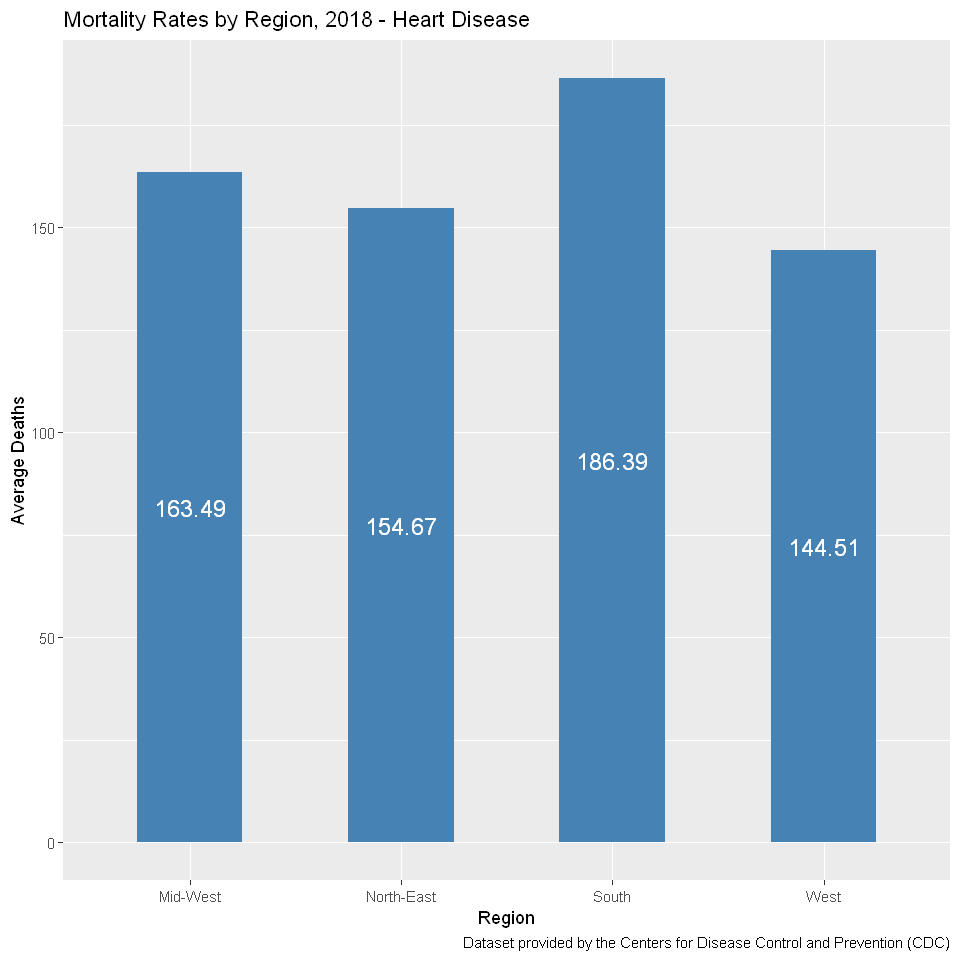

In [4]:
library(repr)
options(repr.plot.width=8, repr.plot.height=8)
ggplot(data=rdf, aes_string(x="Region", y="HeartDis_AVG")) + geom_bar(stat="identity", fill="steelblue", width=0.5) + labs(title="Mortality Rates by Region, 2018 - Heart Disease", caption="Dataset provided by the Centers for Disease Control and Prevention (CDC)",y="Average Deaths") + geom_text(aes(label=round(HeartDis_AVG, digits=2)), position = position_stack(vjust=0.5), color="white", size=5)

In [46]:
trends <- read.df("C:/Users/jack_/Desktop/Big Data Project/output/search_trends_Heart_2018.csv", "csv", inferSchema = "true", header = "true", )
createOrReplaceTempView(trends, "trends")
search_trends <- collect(trends)
s <- sql("select heart_health_avg, '2018' as Year from trends where Region = 'South'")
w <- sql("select heart_health_avg, '2018' as Year from trends where Region = 'West'")
ne <- sql("select heart_health_avg, '2018' as Year from trends where Region = 'North-East'")
mw <- sql("select heart_health_avg, '2018' as Year from trends where Region = 'Mid-West'")
createOrReplaceTempView(s, "s18")
createOrReplaceTempView(w, "w18")
createOrReplaceTempView(ne, "ne18")
createOrReplaceTempView(mw, "mw18")

In [32]:
south_searches <- sql("select * from s14 union select * from s15 union select * from s16 union select * from s17 union select * from s18")
west_searches <- sql("select * from w14 union select * from w15 union select * from w16 union select * from w17 union select * from w18")
northeast_searches <- sql("select * from ne14 union select * from ne15 union select * from ne16 union select * from ne17 union select * from ne18")
midwest_searches <- sql("select * from mw14 union select * from mw15 union select * from mw16 union select * from mw17 union select * from mw18")
createOrReplaceTempView(south_searches, "south_searches")
createOrReplaceTempView(west_searches, "west_searches")
createOrReplaceTempView(northeast_searches, "northeast_searches")
createOrReplaceTempView(midwest_searches, "midwest_searches")

In [42]:
south_totals <- sql("select 'Searches' as Category, heart_health_avg, Year from south_searches union select 'Death Rate' as Category, HeartDis_AVG, Year from south")
west_totals <- sql("select 'Searches' as Category, heart_health_avg, Year from west_searches union select 'Death Rate' as Category, HeartDis_AVG, Year from west")
northeast_totals <- sql("select 'Searches' as Category, heart_health_avg, Year from northeast_searches union select 'Death Rate' as Category, HeartDis_AVG, Year from northeast")
midwest_totals <- sql("select 'Searches' as Category, heart_health_avg, Year from midwest_searches union select 'Death Rate' as Category, HeartDis_AVG, Year from midwest")
south_rdf <- collect(south_totals)
west_rdf <- collect(west_totals)
northeast_rdf <- collect(northeast_totals)
midwest_rdf <- collect(midwest_totals)

In [36]:
head(south_rdf)

,Category,heart_health_avg,Year
,<chr>,<dbl>,<chr>
1,Searches,67.5900,2015
2,Death Rate,191.6500,2015
3,Searches,61.7100,2018
4,Death Rate,190.5062,2014
5,Searches,68.6500,2016
6,Searches,52.5900,2014


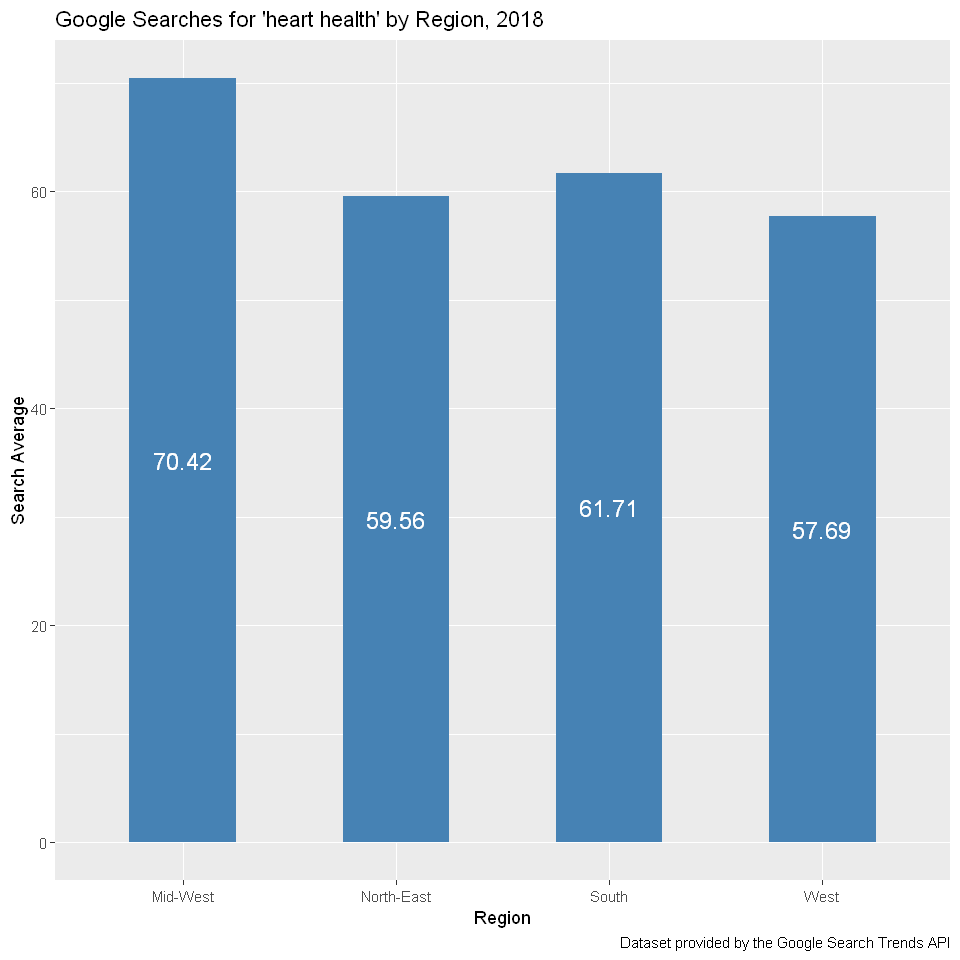

In [47]:
library(repr)
options(repr.plot.width=8, repr.plot.height=8)
ggplot(data=search_trends, aes_string(x="Region", y="heart_health_avg")) + geom_bar(stat="identity", fill="steelblue", width=0.5) + labs(title="Google Searches for 'heart health' by Region, 2018", caption="Dataset provided by the Google Search Trends API", y="Search Average") + geom_text(aes(label=heart_health_avg), position = position_stack(vjust=0.5), color="white", size=5)

In [49]:
added1 <- sql("select c.Region, 'H_Death' as Label, cast(t.heart_health_avg as decimal(5,2)) as heart_health_avg, t.heart_health_avg + c.HeartDis_AVG as heart_sum from heartdis_avg_by_reg c, trends t where c.Region = t.Region")
added2 <- sql("select t.Region, 'H_Search' as Label, cast(c.HeartDis_AVG as decimal(5,2)) as HeartDis_AVG, t.heart_health_avg + c.HeartDis_AVG as heart_sum from heartdis_avg_by_reg c, trends t where c.Region = t.Region")
createOrReplaceTempView(added1, 'added1')
createOrReplaceTempView(added2, 'added2')
joined <- sql("select Region, Label, cast(heart_health_avg as decimal(5,2)) as heartattack_avg, cast(heart_sum as decimal(5,2)) as heart_sum from added1 union select Region, Label, cast(HeartDis_AVG as decimal(5,2)) as HeartDis_avg, cast(heart_sum as decimal(5,2)) as heart_sum from added2")
createOrReplaceTempView(joined, 'joined')
final <- collect(joined)
collect(joined)

,Region,Label,heartattack_avg,heart_sum
,<chr>,<chr>,<dbl>,<dbl>
1,Mid-West,H_Search,163.49,233.91
2,South,H_Search,186.39,248.10
3,South,H_Death,61.71,248.10
4,North-East,H_Death,59.56,214.23
5,North-East,H_Search,154.67,214.23
6,West,H_Death,57.69,202.20
7,Mid-West,H_Death,70.42,233.91
8,West,H_Search,144.51,202.20


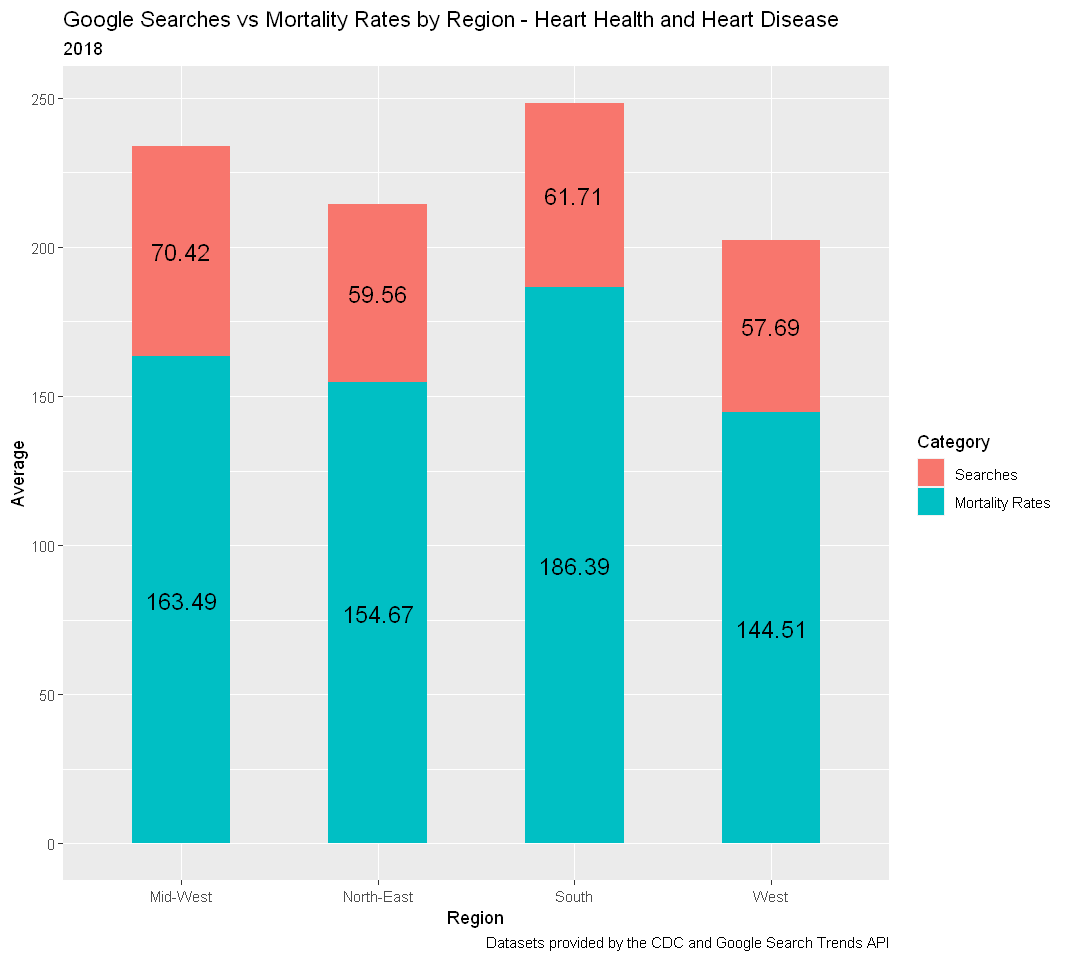

In [50]:
library(repr)
library(forcats)
options(repr.plot.width=9, repr.plot.height=8)

ggplot(data=final, aes_string(x="Region", y="heartattack_avg", fill='Label')) + geom_bar(stat="identity", width=0.5) + geom_text(aes(label=heartattack_avg), position = position_stack(vjust=0.5), color="black", size=5) + labs(title="Google Searches vs Mortality Rates by Region - Heart Health and Heart Disease", subtitle="2018", caption="Datasets provided by the CDC and Google Search Trends API", y="Average") + scale_fill_discrete(name = "Category", labels = c("Searches", "Mortality Rates"))

Warning message:
"Ignoring unknown aesthetics: digits"


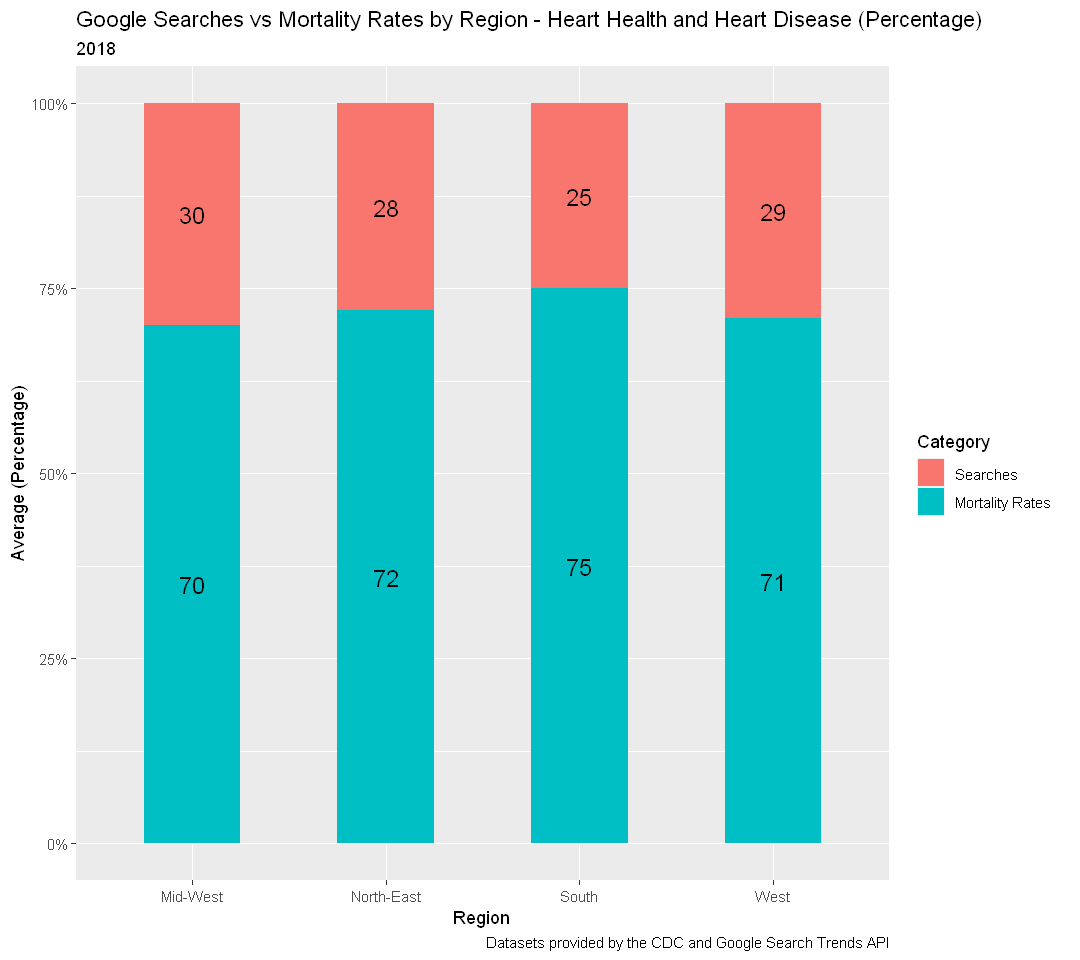

In [9]:
library(scales)
library(forcats)
options(repr.plot.width=9, repr.plot.height=8)
final$Label <- fct_rev(final$Label)
ggplot(data=final, aes(x=Region, y=round((heartattack_avg/heart_sum), digits=2), fill=Label)) + geom_bar(stat="identity", width=0.5) + geom_text(aes(label=round((heartattack_avg/heart_sum)*100), digits=2), position = position_stack(vjust=0.5), color="black", size=5) + labs(title="Google Searches vs Mortality Rates by Region - Heart Health and Heart Disease (Percentage)", subtitle="2018", caption="Datasets provided by the CDC and Google Search Trends API", y="Average (Percentage)") + scale_y_continuous(labels = percent_format(), limits=c(0,1)) + scale_fill_discrete(name = "Category", labels = c("Searches", "Mortality Rates"))

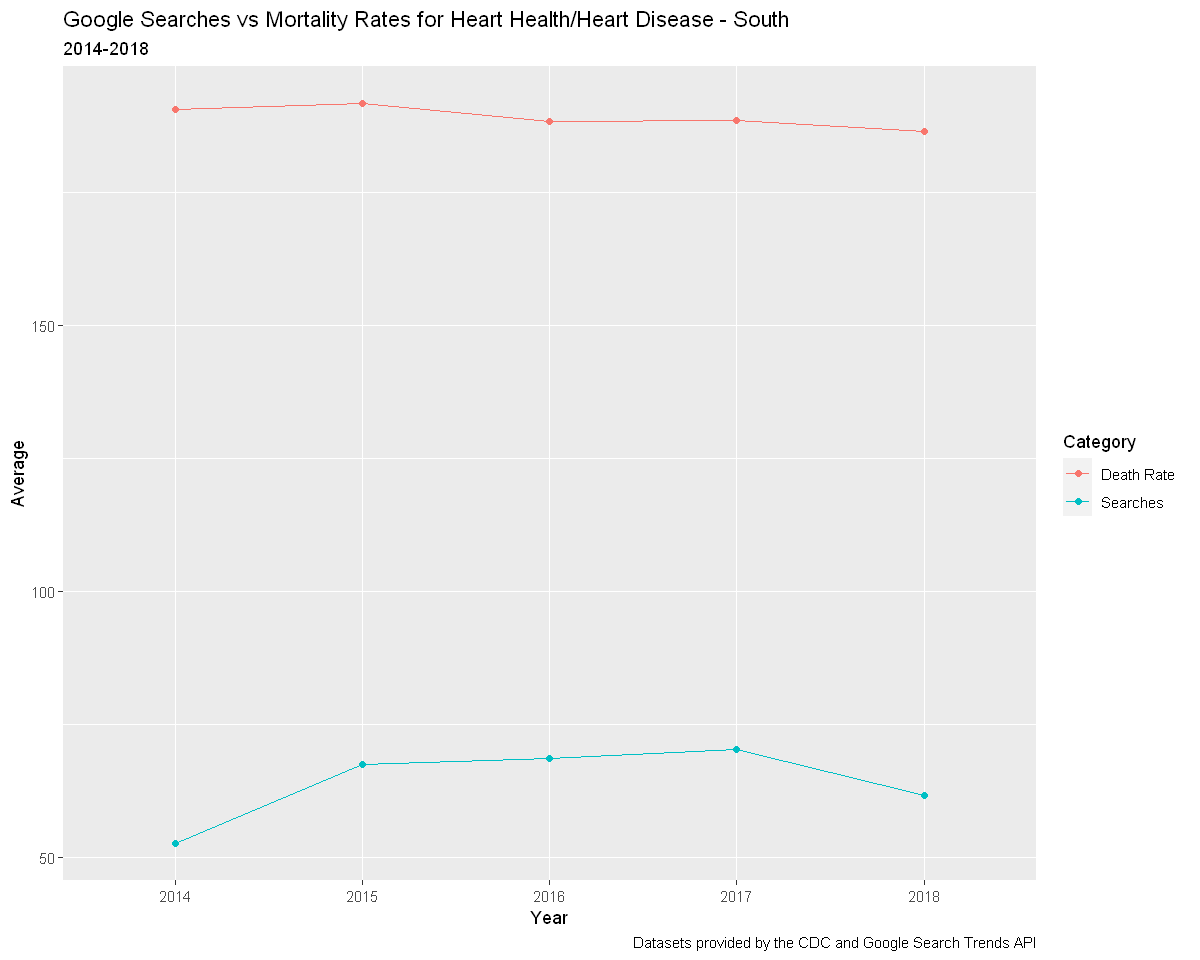

In [38]:
library(repr)
options(repr.plot.width=10, repr.plot.height=8)
ggplot(data=south_rdf, aes(x=Year, y=heart_health_avg, group=Category)) +
  geom_line(aes(color=Category))+
  geom_point(aes(color=Category)) +
labs(title="Google Searches vs Mortality Rates for Heart Health/Heart Disease - South", subtitle="2014-2018", caption="Datasets provided by the CDC and Google Search Trends API", y="Average")

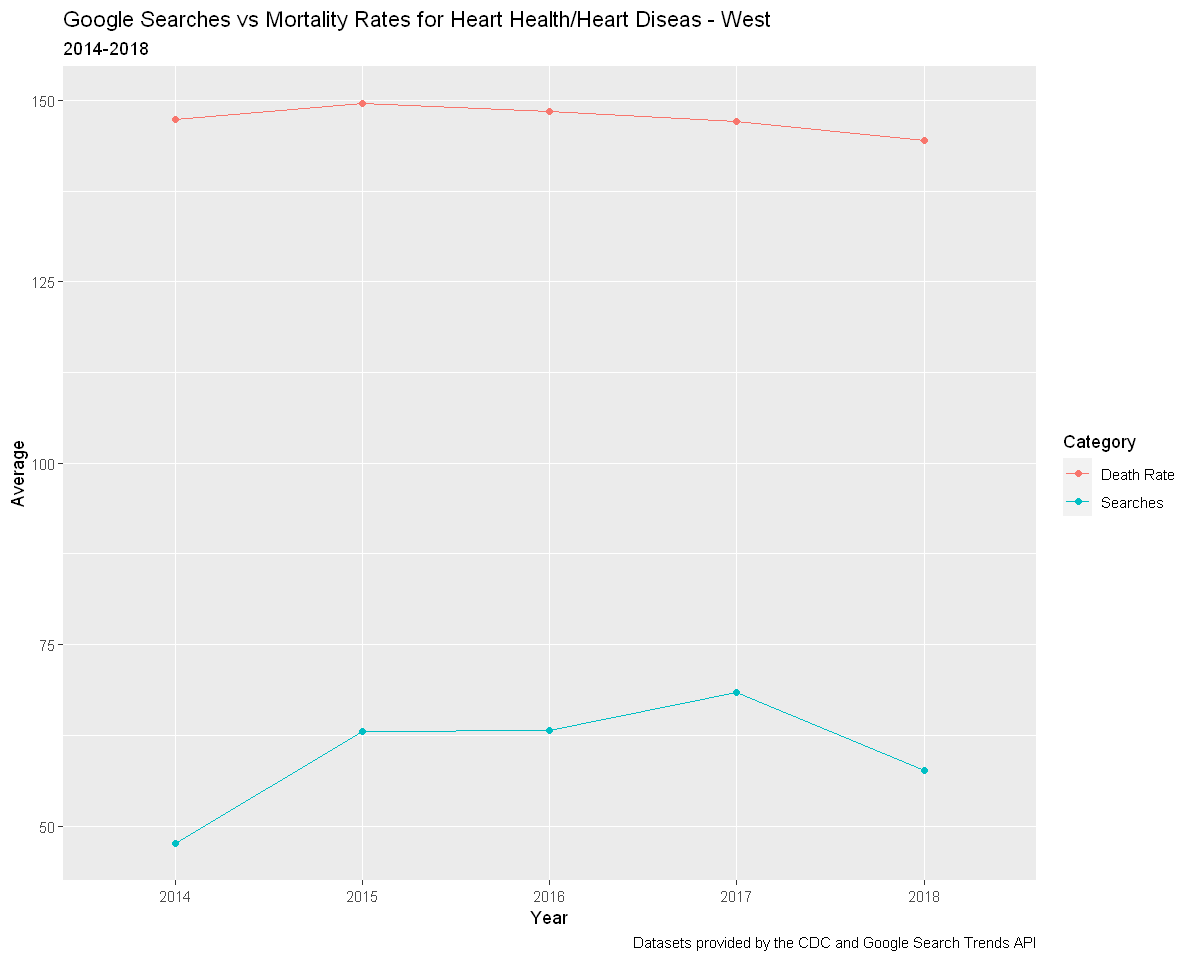

In [39]:
library(repr)
options(repr.plot.width=10, repr.plot.height=8)
ggplot(data=west_rdf, aes(x=Year, y=heart_health_avg, group=Category)) +
  geom_line(aes(color=Category))+
  geom_point(aes(color=Category)) +
labs(title="Google Searches vs Mortality Rates for Heart Health/Heart Diseas - West", subtitle="2014-2018", caption="Datasets provided by the CDC and Google Search Trends API", y="Average")

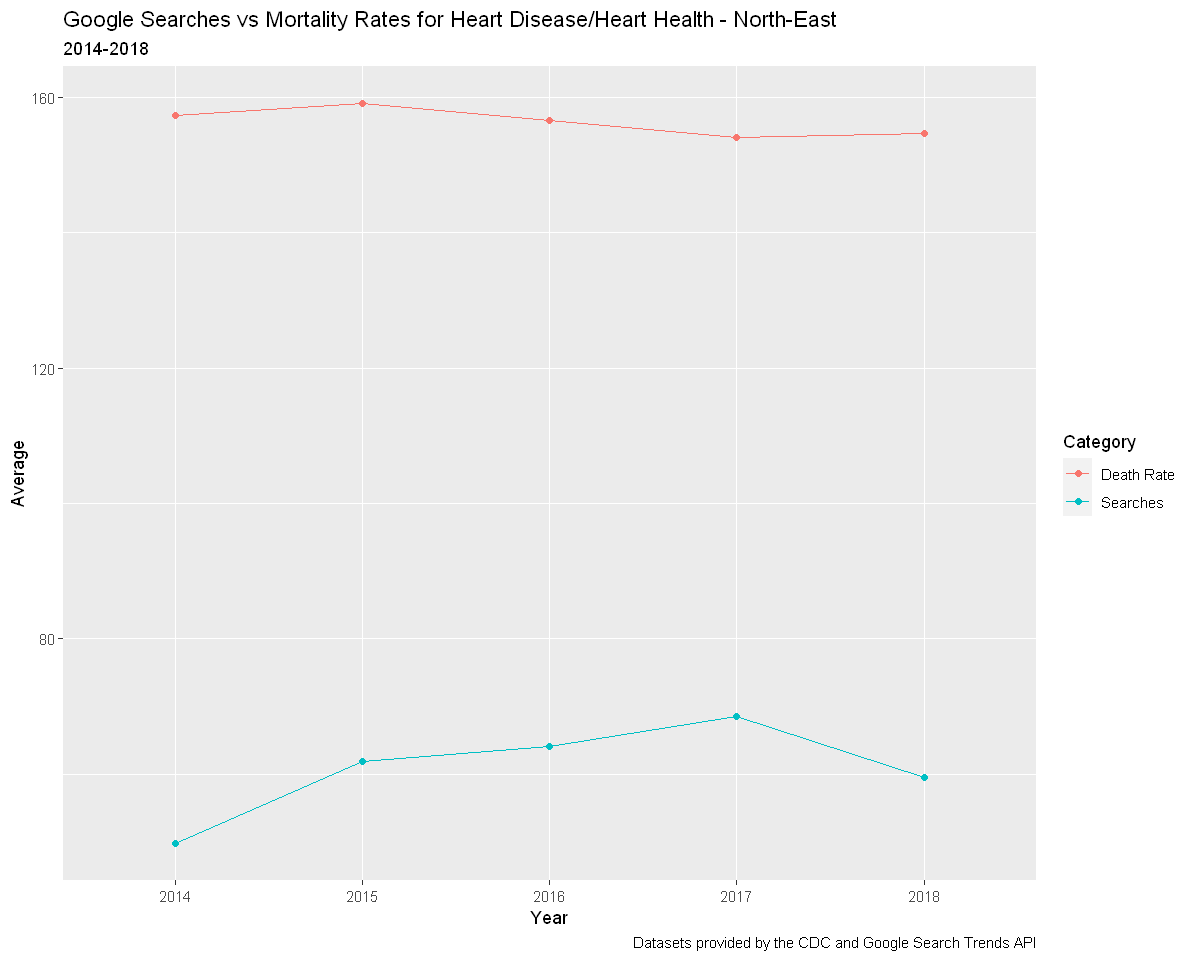

In [43]:
library(repr)
options(repr.plot.width=10, repr.plot.height=8)
ggplot(data=northeast_rdf, aes(x=Year, y=heart_health_avg, group=Category)) +
  geom_line(aes(color=Category))+
  geom_point(aes(color=Category)) +
labs(title="Google Searches vs Mortality Rates for Heart Disease/Heart Health - North-East", subtitle="2014-2018", caption="Datasets provided by the CDC and Google Search Trends API", y="Average")

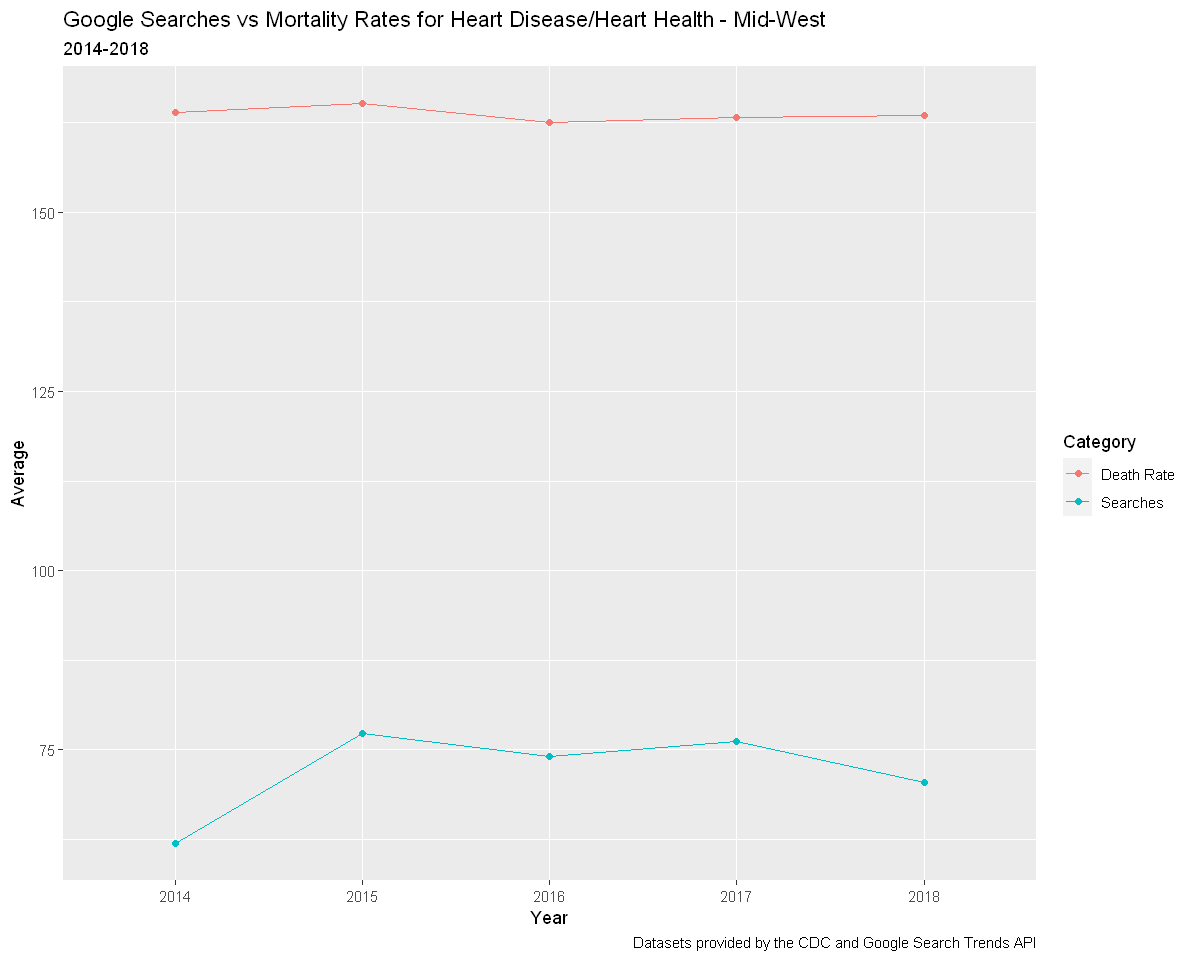

In [44]:
library(repr)
options(repr.plot.width=10, repr.plot.height=8)
ggplot(data=midwest_rdf, aes(x=Year, y=heart_health_avg, group=Category)) +
  geom_line(aes(color=Category))+
  geom_point(aes(color=Category)) +
labs(title="Google Searches vs Mortality Rates for Heart Disease/Heart Health - Mid-West", subtitle="2014-2018", caption="Datasets provided by the CDC and Google Search Trends API", y="Average")